# XG325: Explainable Artificial Intelligence
    
## Exercise 2

**Week 07 | Lecture 03**

_Saturday, April 13, 2025_

Presented by Dr. Marcin Abram

In [1]:
import numpy
import pandas
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import tensorflow

numpy.set_printoptions(suppress=True)
numpy.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual

## Example (Simple Neural Network)

In [2]:
(trainval_x, trainval_y), (test_x, test_y) = tensorflow.keras.datasets.mnist.load_data()
trainval_x.shape, trainval_x.dtype

((60000, 28, 28), dtype('uint8'))

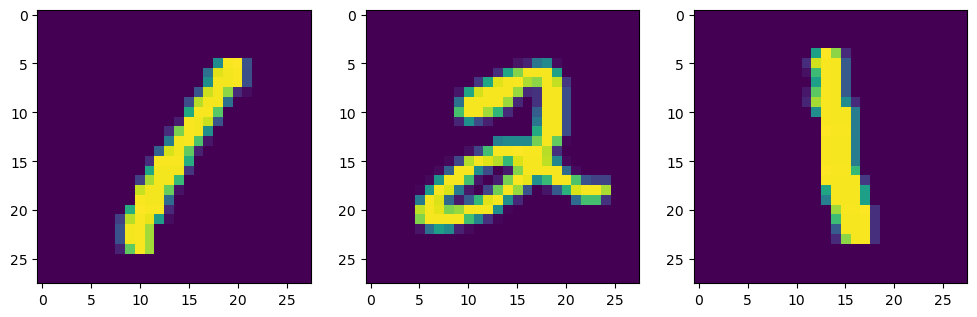

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(trainval_x[3])
axes[1].imshow(trainval_x[5])
axes[2].imshow(trainval_x[6])
plt.show()

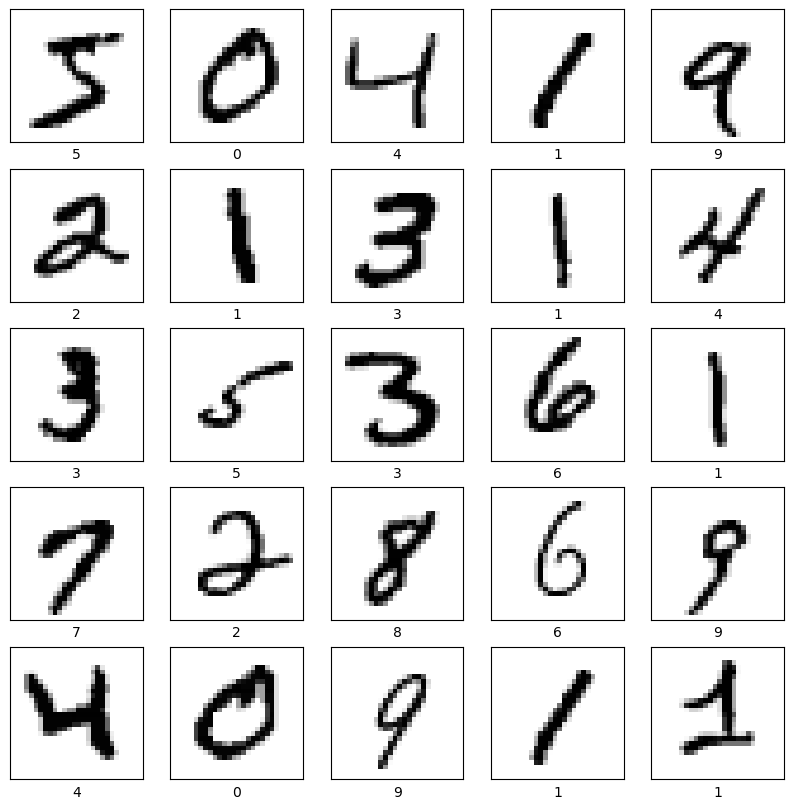

In [4]:
"""Preprocessing"""
trainval_x = trainval_x/255.0
test_x = test_x/255.0

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainval_x[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainval_y[i]])
plt.show()

In [5]:
# Create random indices
numpy.random.seed(44)
N = len(trainval_x)
shuffled_indices = numpy.random.permutation(N)

# Split indices into train, validation and test sets
train_indices = shuffled_indices[:int(N*0.8)]
valid_indices = shuffled_indices[int(N*0.8):]

#  Split data into train, validation and test sets
train_x = trainval_x[train_indices]
valid_x = trainval_x[valid_indices]
train_y = trainval_y[train_indices]
valid_y = trainval_y[valid_indices]

train_x.shape, valid_x.shape, test_x.shape, train_y.shape, valid_y.shape, test_y.shape

((48000, 28, 28),
 (12000, 28, 28),
 (10000, 28, 28),
 (48000,),
 (12000,),
 (10000,))

## Simple Neural Network

In [6]:
"""Build model"""
onelayer = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(28, 28)),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(10)
])

onelayer.compile(
    optimizer='adam',
    loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

onelayer.summary()

/opt/miniconda3/envs/deeplearning-env/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-04-13 14:20:42.086725: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-04-13 14:20:42.086757: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-13 14:20:42.086772: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-13 14:20:42.086811: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-13 14:20:42.086826: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
"""Train"""
onelayer.fit(train_x, train_y, epochs=3, validation_data=(valid_x,  valid_y))

Epoch 1/3


2025-04-13 14:20:43.381772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8521 - loss: 0.5181 - val_accuracy: 0.9093 - val_loss: 0.3179
Epoch 2/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9140 - loss: 0.3068 - val_accuracy: 0.9121 - val_loss: 0.3186
Epoch 3/3
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9173 - loss: 0.3006 - val_accuracy: 0.9118 - val_loss: 0.3271


In [8]:
"""Evaluate"""
test_loss, test_acc = onelayer.evaluate(test_x,  test_y, verbose=2)
test_loss, test_acc

313/313 - 1s - 4ms/step - accuracy: 0.9155 - loss: 0.3221


(0.3221100866794586, 0.9154999852180481)

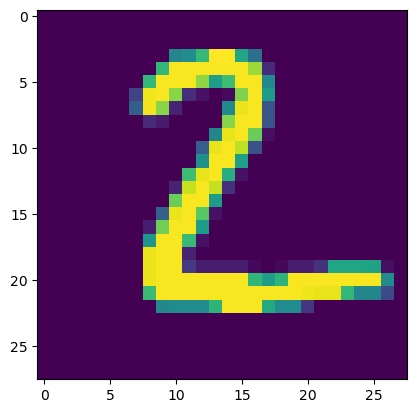

In [9]:
plt.imshow(test_x[1])

In [10]:
pred = onelayer.predict(test_x[1].reshape(-1, 28, 28, 1))
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


array([[  8.997155 ,   3.7991817,  23.200584 ,  14.667284 , -17.04278  ,
         15.307381 ,  16.709946 , -25.081776 ,   9.888695 , -12.812353 ]],
      dtype=float32)

In [11]:
numpy.argmax(pred), test_y[1]

(2, 2)

## Exercise 2

Design a simple case to illustrate Clever Hans effect.
 1. Add an artefact, that would help the network to classify the numbers (e.g., an extra point in a corner for every 0, an extra point in a different corner for every 1, etc.)
 2. Train your network.
 3. Check how it perform on the test set (check both variants, where you make the same modification to the test set and where you have an original unmodified test set).

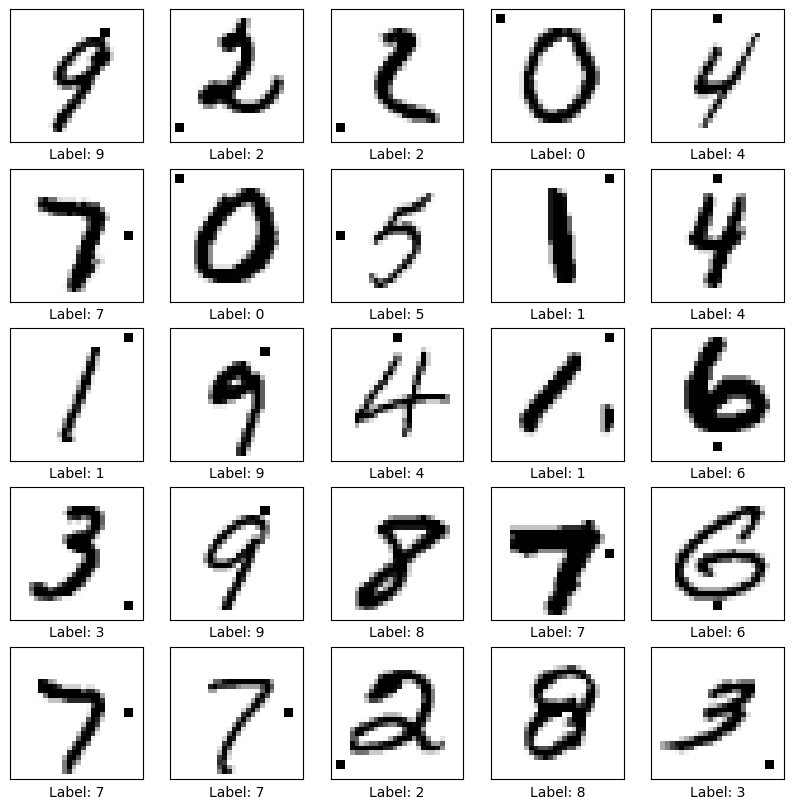


Evaluation on modified test set (with markers):
313/313 - 1s - 4ms/step - accuracy: 0.9998 - loss: 3.1726e-04

Evaluation on original test set (without markers):
313/313 - 1s - 4ms/step - accuracy: 0.3454 - loss: 3.4805

Accuracy on modified test set: 0.9998
Accuracy on original test set: 0.3454
Accuracy drop: 0.6544


In [18]:
def add_markers(images, labels):
    modified_images = images.copy()

    marker_positions = {
        0: (2, 2),
        1: (2, 25),
        2: (25, 2),
        3: (25, 25),
        4: (2, 14),
        5: (14, 2),
        6: (25, 14),
        7: (14, 25),
        8: (14, 14),
        9: (5, 20)
    }

    for i in range(len(images)):
        digit = labels[i]
        position = marker_positions[digit]

        r, c = position
        modified_images[i, r-1:r+1, c-1:c+1] = 1.0

    return modified_images

train_x_modified = add_markers(train_x, train_y)
valid_x_modified = add_markers(valid_x, valid_y)

test_x_modified = add_markers(test_x, test_y)
test_x_original = test_x.copy()

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_x_modified[i], cmap=plt.cm.binary)
    plt.xlabel(f"Label: {train_y[i]}")
plt.show()

model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(input_shape=(28, 28)),
    tensorflow.keras.layers.Dense(128, activation='relu'),
    tensorflow.keras.layers.Dense(10)
])

model.compile(
    optimizer='adam',
    loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(
    train_x_modified, train_y,
    epochs=5,
    validation_data=(valid_x_modified, valid_y),
    verbose=0
)

print("\nEvaluation on modified test set (with markers):")
test_loss_modified, test_acc_modified = model.evaluate(test_x_modified, test_y, verbose=2)

print("\nEvaluation on original test set (without markers):")
test_loss_original, test_acc_original = model.evaluate(test_x_original, test_y, verbose=2)

print(f"\nAccuracy on modified test set: {test_acc_modified:.4f}")
print(f"Accuracy on original test set: {test_acc_original:.4f}")
print(f"Accuracy drop: {test_acc_modified - test_acc_original:.4f}")